# Epileptic Seizures

## Context

Five sets (denoted A–E) each containing 100 single channel EEG segments of 23.6-sec duration, were composed
for the study. These segments were selected and cut out from continuous multichannel EEG recordings after visual inspection for artifacts, e.g., due to muscle activity or eye movements.

Sets A and B consisted of segments taken from surface EEG recordings that were carried out on five healthy volunteers using a standardized electrode placement scheme <img src="Images/fig_1.png">.

Volunteers were relaxed in an awake state with eyes open (Set A) and eyes closed (Set B) respectively. Sets C, D and E originated from the EEG archive of presurgical diagnosis.

For the present study EEGs from five patients were selected, all of whom had achieved complete seizure control after resection of one of the hippocampal formations, which was therefore correctly diagnosed to be the epileptogenic zone. <img src="Images/fig_2.png">

Segments in set D were recorded from within the epileptogenic zone, and those in set C from the hippocampal formation of the opposite hemisphere of the brain. While sets C and D contained only activity measured during seizure free intervals, set E only contained seizure activity. Here segments were selected from all recording sites exhibiting ictal activity.

### Import the Libraries

In [1]:
from data import BonnDataset
from process import create_scalogram, data_split
from model import ResNet, DataGenerator
from plot import plot_eeg, plot_scalograms

import numpy as np
import pywt
import random

### Define the parameters

In [2]:
DATA_PATH = '.\\'
BATCH_SIZE = 32
SCALO_DIR = '.\\processed_data'
random_search = False

SCALES_RANGE = np.arange(5, 71, 5)
NUM_SCALES_RANGE = np.arange(60, 180, 10)
WS_RANGE = np.arange(1.0, 3.01, 0.5)
WAVELETS = pywt.wavelist(kind='continuous')

if random_search:
    scales = random.choice(SCALES_RANGE)
    num_scales = random.choice(NUM_SCALES_RANGE)
    window_size = random.choice(WS_RANGE)
    wavelet = random.choice(WAVELETS)
else:
    scales = 20
    num_scales = 130
    window_size = 2.0
    wavelet = 'cgau7'

parameters = {'scales': scales, 'num_scales': num_scales, 'window_size': window_size, 'wavelets': wavelet}

### Load the raw EEG data

In [3]:
dataset = BonnDataset(DATA_PATH).load()

### Visualize the data

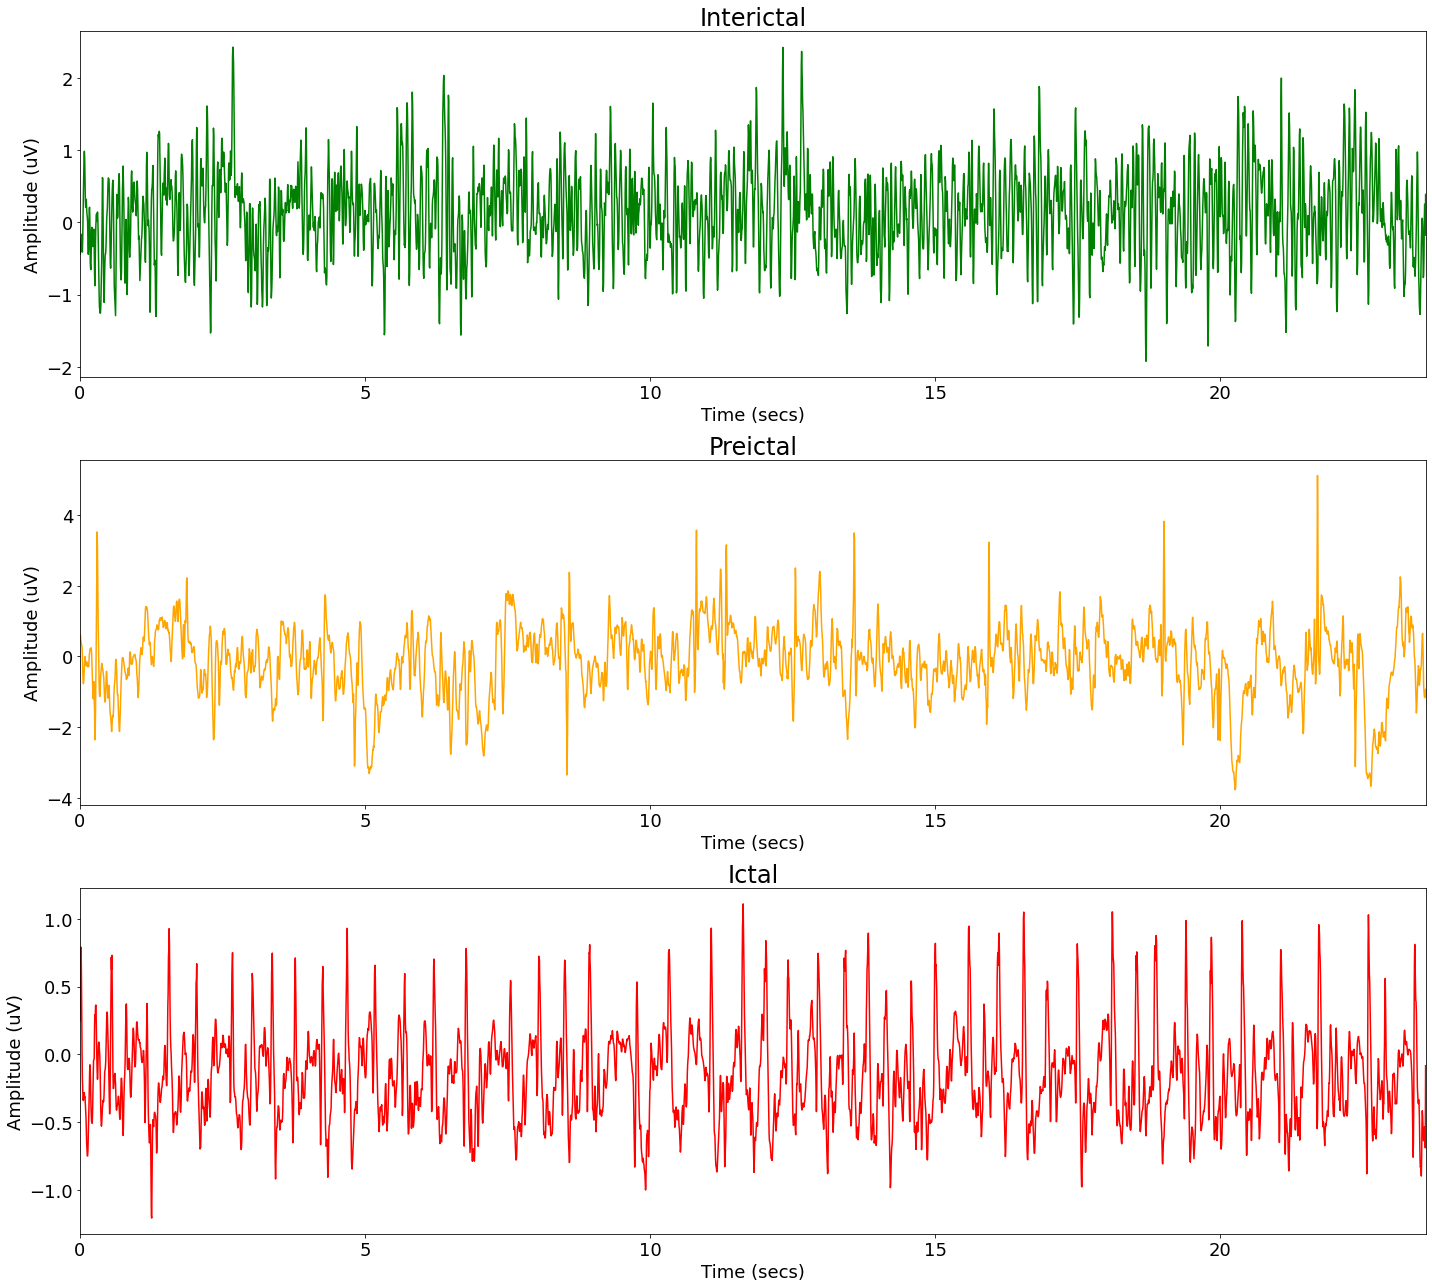

In [4]:
plot_eeg(dataset)

### Perform Wavelet Transform

In [ ]:
create_scalogram(dataset, parameters, SCALO_DIR)

### Visualize the Scalograms

C:\Users\loosa\PycharmProjects\Epileptic Seizures (University of Bonn)\plot.py:95: ComplexWarning: Casting complex values to real discards the imaginary part
  interictal_data = np.load(interictal_data_list[interictal_num]).astype(float)
C:\Users\loosa\PycharmProjects\Epileptic Seizures (University of Bonn)\plot.py:96: ComplexWarning: Casting complex values to real discards the imaginary part
  preictal_data = np.load(preictal_data_list[preictal_num]).astype(float)
C:\Users\loosa\PycharmProjects\Epileptic Seizures (University of Bonn)\plot.py:97: ComplexWarning: Casting complex values to real discards the imaginary part
  ictal_data = np.load(ictal_data_list[ictal_num]).astype(float)
C:\Users\loosa\PycharmProjects\Epileptic Seizures (University of Bonn)\plot.py:113: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud'

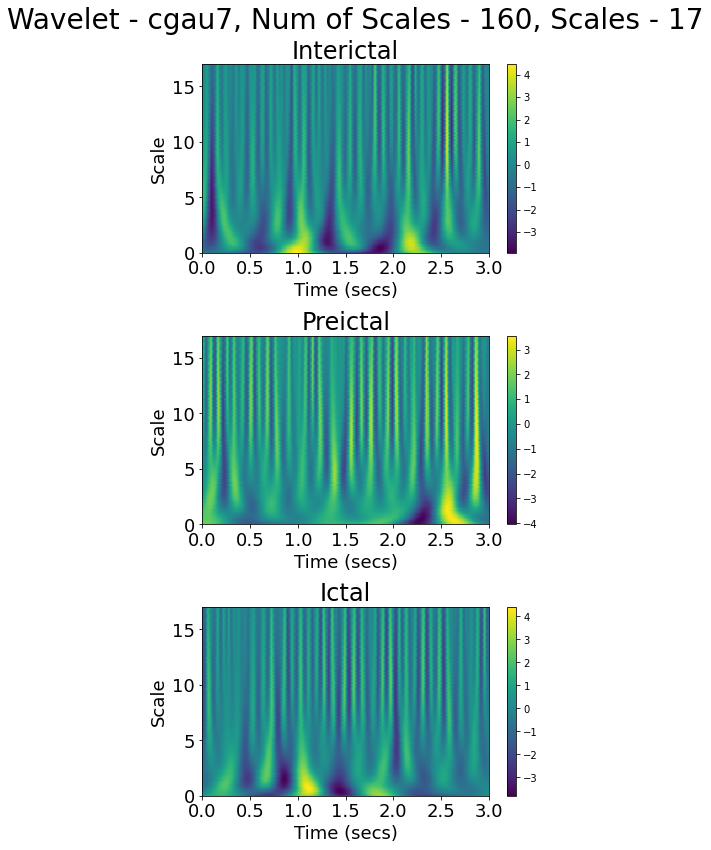

In [6]:
plot_scalograms(SCALO_DIR, parameters)